In [ ]:
#KERNEL KATS

In [3]:
%%capture
!pip install kats

  Using cached kats-0.2.0-py3-none-any.whl (612 kB)
  Using cached pytest_mpl-0.16.1-py3-none-any.whl (28 kB)
  Using cached statsmodels-0.12.2-cp37-none-win_amd64.whl (9.3 MB)
  Using cached plotly-5.10.0-py2.py3-none-any.whl (15.2 MB)
  Using cached gpytorch-1.8.1-py2.py3-none-any.whl (361 kB)
  Using cached numba-0.56.2-cp37-cp37m-win_amd64.whl (2.5 MB)
  Using cached attrs-22.1.0-py2.py3-none-any.whl (58 kB)
  Using cached Deprecated-1.2.13-py2.py3-none-any.whl (9.6 kB)
  Using cached scikit_learn-1.0.2-cp37-cp37m-win_amd64.whl (7.1 MB)
  Using cached pymannkendall-1.4.2-py3-none-any.whl (12 kB)
  Using cached torch-1.12.1-cp37-cp37m-win_amd64.whl (161.9 MB)
  Using cached ax_platform-0.2.4-py3-none-any.whl (950 kB)
  Using cached seaborn-0.12.0-py3-none-any.whl (285 kB)
  Using cached Jinja2-3.1.2-py3-none-any.whl (133 kB)
  Using cached botorch-0.6.2-py3-none-any.whl (347 kB)
  Using cached cmdstanpy-0.9.5-py3-none-any.whl (37 kB)
  Using cached patsy-0.5.3-py2.py3-none-any.whl (

In [4]:
import sys
sys.path.append("../")

import numpy as np
import pandas as pd
import pprint
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from kats.consts import TimeSeriesData
from statsmodels.tsa.seasonal import STL
from kats.utils.simulator import Simulator
from sklearn.preprocessing import StandardScaler
from kats.tsfeatures.tsfeatures import TsFeatures

import warnings
warnings.simplefilter(action='ignore')

C:\ProgramData\Anaconda3\envs\kats\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
sim = Simulator(n=90, freq="D", start = "2021-01-01") # simulate 90 days of data
random_seed = 100

# generate 10 TimeSeriesData with arima_sim
np.random.seed(random_seed) # setting numpy seed
arima_sim_list = [sim.arima_sim(ar=[0.1, 0.05], ma = [0.04, 0.1], d = 1) for _ in range(10)]

# generate 10 TimeSeriesData with trend shifts
trend_sim_list = [
    sim.trend_shift_sim(
        cp_arr = [30, 60, 75],
        trend_arr=[3, 15, 2, 8],
        intercept=30,
        noise=50,
        seasonal_period=7,
        seasonal_magnitude=np.random.uniform(10, 100),
        random_seed=random_seed
    ) for _ in range(10)
]


# generate 10 TimeSeriesData with level shifts
level_shift_list = [
    sim.level_shift_sim(
        cp_arr = [30, 60, 75],
        level_arr=[1.35, 1.05, 1.35, 1.2],
        noise=0.05,
        seasonal_period=7,
        seasonal_magnitude=np.random.uniform(0.1, 1.0),
        random_seed=random_seed
    ) for _ in range(10)
]
ts_list = arima_sim_list + trend_sim_list + level_shift_list

In [12]:
ts_list[1]

,time,value
0,2021-01-01,1.315192
1,2021-01-02,1.999997
2,2021-01-03,0.362509
3,2021-01-04,0.089215
4,2021-01-05,-1.761805
...,...,...
85,2021-03-27,4.780516
86,2021-03-28,5.377503
87,2021-03-29,4.904761
88,2021-03-30,5.030832


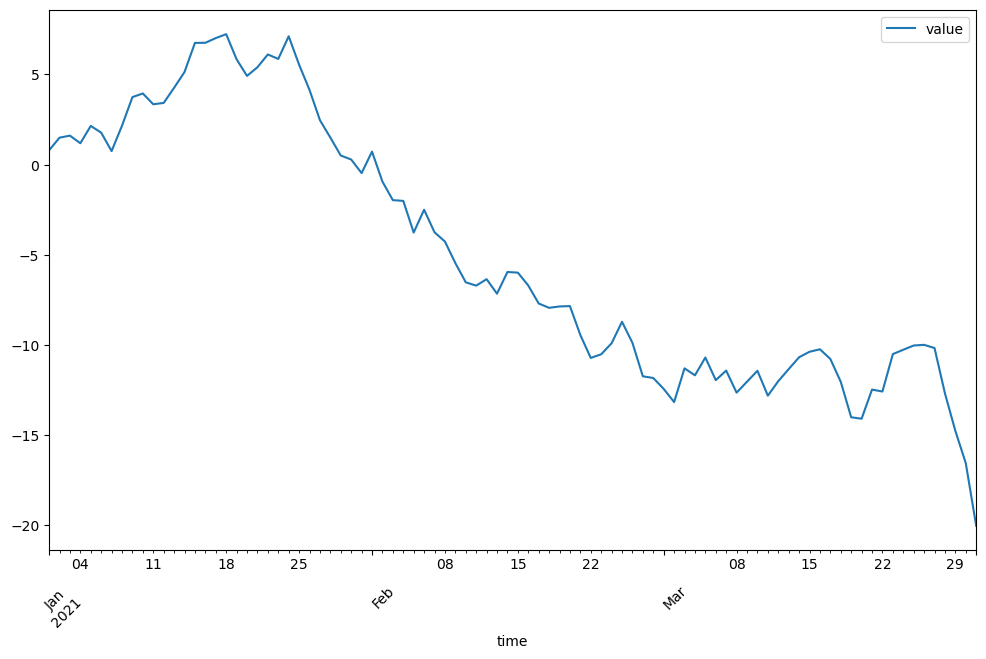

In [7]:
ts = ts_list[0]

# plot the time series
ts.plot(cols=['value'])
plt.xticks(rotation = 45)
plt.show()

In [8]:
# Step 1. initiate TsFeatures
model = TsFeatures()

# Step 2. use .transform() method, and apply on the target time series data
output_features = model.transform(ts)
output_features

{'length': 90,
 'mean': -4.973228083549793,
 'var': 50.69499812650379,
 'entropy': 0.2742447620827895,
 'lumpiness': 10.258210327109449,
 'stability': 45.07760417461487,
 'flat_spots': 1,
 'hurst': 0.4188436896564726,
 'std1st_der': 0.8773588739369633,
 'crossing_points': 5,
 'binarize_mean': 0.43333333333333335,
 'unitroot_kpss': 0.41641147078333335,
 'heterogeneity': 73.29527168434541,
 'histogram_mode': -11.841676172131818,
 'linearity': 0.8346355269096618,
 'trend_strength': 0.9853025999592567,
 'seasonality_strength': 0.3521955818150291,
 'spikiness': 0.00020455870537077636,
 'peak': 1,
 'trough': 6,
 'level_shift_idx': 23,
 'level_shift_size': 0.7134342301151566,
 'y_acf1': 0.9597578784708428,
 'y_acf5': 4.0361834721280365,
 'diff1y_acf1': 0.1830233735938267,
 'diff1y_acf5': 0.0794760417768679,
 'diff2y_acf1': -0.4816907863327952,
 'diff2y_acf5': 0.24476824866108501,
 'y_pacf5': 0.9862593061001352,
 'diff1y_pacf5': 0.07981792144706332,
 'diff2y_pacf5': 0.36145785941160113,
 'seas

In [ ]:
model = TsFeatures()
output_features = [model.transform(ts) for ts in ts_list]